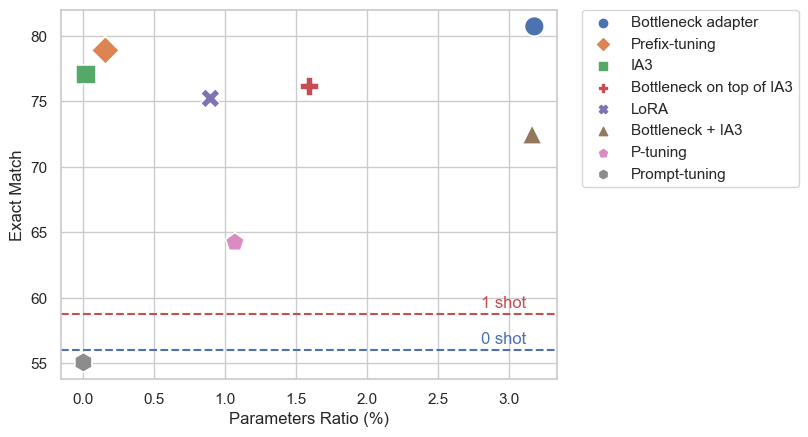

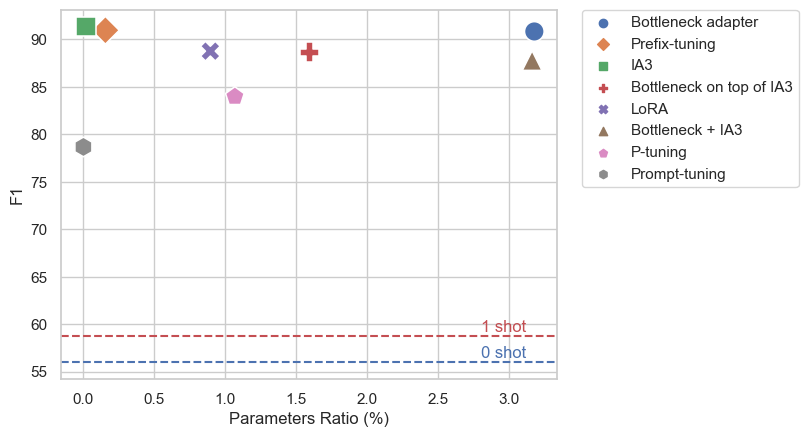

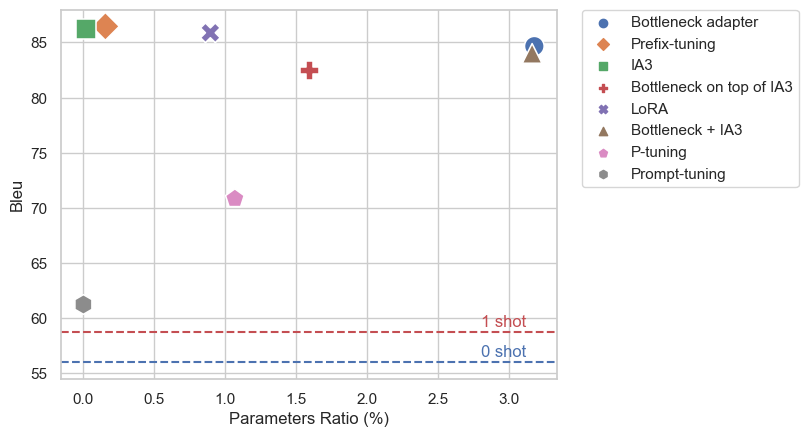

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data from analysis-result.csv
df = pd.read_csv("analysis-result.csv")

markers = ["o", "D", "s", "P", "X", "^", "p", "h"]

sns.set_theme(style="whitegrid")

em_scat = sns.scatterplot(
    x="param_ratio",
    y="em",
    hue="method",
    data=df[0 : len(df) - 3],
    s=200,
    style=df[0 : len(df) - 3]["method"],
    markers=markers,
)
em_scat.set(xlabel="Parameters Ratio (%)", ylabel="Exact Match")
plt.axhline(
    y=df.iloc[len(df) - 2]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="b", linestyle="dashed", label="_nolegend_"
)
plt.text(2.8, df.iloc[len(df) - 2]["em"] + 0.5, "1 shot", color="r")
plt.text(2.8, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()
em_scat.figure.savefig("./figs/em.png", bbox_inches="tight")

f1_scat = sns.scatterplot(
    x="param_ratio",
    y="f1",
    hue="method",
    data=df[0 : len(df) - 3],
    s=200,
    style=df[0 : len(df) - 3]["method"],
    markers=markers,
)
f1_scat.set(xlabel="Parameters Ratio (%)", ylabel="F1")
plt.axhline(
    y=df.iloc[len(df) - 2]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="b", linestyle="dashed", label="_nolegend_"
)
plt.text(2.8, df.iloc[len(df) - 2]["em"] + 0.5, "1 shot", color="r")
plt.text(2.8, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()
f1_scat.figure.savefig("./figs/f1.png", bbox_inches="tight")

f1_scat = sns.scatterplot(
    x="param_ratio",
    y="bleu",
    hue="method",
    data=df[0 : len(df) - 3],
    s=200,
    style=df[0 : len(df) - 3]["method"],
    markers=markers,
)
f1_scat.set(xlabel="Parameters Ratio (%)", ylabel="Bleu")
plt.axhline(
    y=df.iloc[len(df) - 2]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="b", linestyle="dashed", label="_nolegend_"
)
plt.text(2.8, df.iloc[len(df) - 2]["em"] + 0.5, "1 shot", color="r")
plt.text(2.8, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()
f1_scat.figure.savefig("./figs/bleu.png", bbox_inches="tight")